# Calculate the observed amplitudes with data.

Define constants

In [1]:
from math import sqrt, radians, atan2, atan, tan, degrees
from IPython.display import Latex
import numpy as np
font_size=14
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu

$$ \delta ' = \tan\left(\frac{B_z}{B_y}\right)  \approx \frac{B_z}{B_y}$$

In [2]:
delta_lab = 12.3# ppm or urad 
delta_lab_e = 25.1 # ppm or urad 
print("Tilt angle in the lab frame", delta_lab, "+-" ,delta_lab_e, "urad")

Tilt angle in the lab frame 12.3 +- 25.1 urad


$$ \frac{\Delta \omega_a}{\omega_a} = \frac{1}{2}\left(\frac{(1+a_{\mu})}{a_{\mu}\gamma}\frac{B_z}{B_y}\right)^2 $$

In [3]:
aMuon= 11659208.9e-10  
betaGammaMagicSquared = (1.0 / aMuon)
gammaMagicSquared = (1.0 + betaGammaMagicSquared)
gammaMagic=sqrt(gammaMagicSquared)
print("ɣ"+"={0:.5f}".format(gammaMagic))

ɣ=29.30343


In [4]:
def func_omega(delta):
    delta = delta*1e-6 # input in ppm
    corr = 0.5 * ( ( (1+aMuon)/(aMuon*gammaMagic) ) * delta )**2
    return corr*1e+6 # output in ppm

def func_omega_error(delta, delta_e):
    delta = delta*1e-6 # input in ppm
    delta_e = delta_e*1e-6 # input in ppm
    corr_e = abs(delta)*delta_e* ( (1+aMuon)/(aMuon*gammaMagic) )**2
    return corr_e*1e6 # output in ppm

In [5]:
delta_omega = func_omega(delta_lab)
delta_omega_e = func_omega_error(delta_lab, delta_lab_e)
print("For Bz of", delta_lab,"+-",delta_lab_e, "ppm")
print("Omega_a uncertainty", round(delta_omega,3), "+-", round(delta_omega_e,3), "ppm")
print("Omega_a uncertainty", round(delta_omega*1e3,1), "+-", round(delta_omega_e*1e3,1), "ppb")

For Bz of 12.3 +- 25.1 ppm
Omega_a uncertainty 0.065 +- 0.265 ppm
Omega_a uncertainty 65.0 +- 265.1 ppb


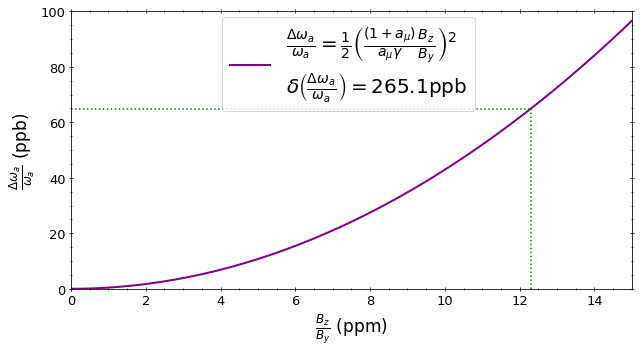

In [6]:
delta_test = np.linspace(0, delta_lab+delta_lab_e*1.5, 400)
label_func = r"$ \frac{\Delta \omega_a}{\omega_a} = \frac{1}{2}\left(\frac{(1+a_{\mu})}{a_{\mu}\gamma}\frac{B_z}{B_y}\right)^2$"
label_func += "\n"+r"$\delta\left(\frac{\Delta \omega_a}{\omega_a}\right)=$"+str(round(delta_omega_e*1e3,1))+ "ppb"
fig, ax = cu.plot(delta_test, func_omega(delta_test)*1e3, figsize=(9,5), plot=True, lw=2, ls="-", c="purple", label=label_func)
ax.set_xlabel(r"$\frac{B_z}{B_y}$ (ppm)", fontsize=17)
ax.set_ylabel(r"$\frac{\Delta \omega_a}{\omega_a}$ (ppb)", fontsize=17)

ax.set_xlim(0, 15)
ax.set_ylim(0, 100)

ax.plot([delta_lab,delta_lab],[0, delta_omega*1e3], ls=":", c="g", zorder=1)

ax.plot([0,delta_lab],[delta_omega*1e3, delta_omega*1e3], ls=":", c="g", zorder=1)
ax.legend(fontsize=20, loc=(0.27, 0.64))
fig.tight_layout()
plt.savefig("../fig/ppb_bz_money.png", dpi=200)

In [9]:
n_tracks_r1 = 64.3e6
bz_unc = 25.1
r1_prec = bz_unc
print("Using", n_tracks_r1/1e6, "M tracks in the analysis, yielding", round(r1_prec,2), "ppb")
goal_prec = 5 # ppb 
print("Goal precision", goal_prec, "ppb")

Using 64.3 M tracks in the analysis, yielding 25.1 ppb
Goal precision 5 ppb


In [10]:
raw_e_BNL_r1 = 2 # x2 BNL 
n_tracks_per_BNL = n_tracks_r1/raw_e_BNL_r1
print("Collecting", n_tracks_per_BNL, "tracks per BNL worth of e+")
runs = (1, 2, 3, 4, 5)
runs_BNL = (2,  4.2, 7.6, 15.0, 21.0)
runs_BNL_corr = (1, 1.6, 1.8, 1.8, 1.8)
tracks = np.array(runs_BNL) * n_tracks_per_BNL
print("Uncorrected", tracks)
tracks = np.multiply(runs_BNL_corr, tracks)
print("Corrected", tracks)

Uncorrected [6.4300e+07 1.3503e+08 2.4434e+08 4.8225e+08 6.7515e+08]
Corrected [6.43000e+07 2.16048e+08 4.39812e+08 8.68050e+08 1.21527e+09]


In [16]:
prec = np.sqrt(n_tracks_r1) * r1_prec/np.sqrt(tracks)
prec_4 = np.sqrt(n_tracks_r1) * r1_prec/np.sqrt(tracks*4)
prec_2 = np.sqrt(n_tracks_r1) * r1_prec/np.sqrt(tracks*2)

In [29]:
prec_min = 0.0
prec_max= 26

No plot style specified, returning a nicely formatted axis only: use it e.g. 'ax.plot()'


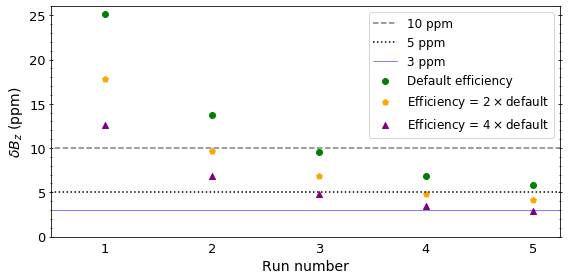

In [40]:
fig, ax = cu.plot(None, None, figsize=(8,4));
ax.scatter(runs, prec, c="g", marker="o", label="Default efficiency")
ax.scatter(runs, prec_2, c="orange", marker="p", label=r"Efficiency = $2\times \rm{default}$")
ax.scatter(runs, prec_4, c="purple", marker="^", label=r"Efficiency = $4\times \rm{default}$")

# only int ticks on x-axis
plt.xticks(runs)
ax.set_xlim(0.5, 5.25)
ax.set_xlabel("Run number")
ax.tick_params(axis='x', which='both', bottom=False, top=False, direction='inout')

#now set exact limits and allow secondary axis
ax.set_ylim(prec_min, prec_max)
ax.set_ylabel(r"$\delta B_z$ (ppm)")


# Plot the BNL and 1ppm lines
# ax.plot( [-0.1, 6], [100, 100], c="blue", ls="--", label="100 ppb")
ax.plot( [-0.1, 6], [10, 10], c="gray", ls="--", label="10 ppm")
ax.plot( [-0.1, 6], [5, 5], label="5 ppm", c="black", ls=":")
ax.plot( [-0.1, 6], [3, 3], label="3 ppm", c="blue", ls="-", lw=0.5)

ax.legend(fontsize=12)
fig.tight_layout()
plt.savefig("../fig/bz_money.png", dpi=200)